In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
import pandas as pd
from shapely.geometry import Polygon, MultiPoint

In [2]:
data = pd.read_hdf("/media/data/Data/BallBearing/HIPS/PhaseDiagramsNewPlate/2,10mm/80%/480.hdf5")

In [9]:
def add_edge_distance(data):
    points = data[['x', 'y']].values
    hull = spatial.ConvexHull(points)
    hull_points = points[hull.vertices, :]
    polygon = Polygon(hull_points)
    multi_point = MultiPoint(points)
    dists = [polygon.exterior.distance(p) for p in multi_point.geoms]
    data['edge_distance'] = dists
    return data, hull.volume

In [10]:
data, area = add_edge_distance(data)

In [28]:
frame = data.loc[0]

In [29]:
x = frame.x.values
y = frame.y.values

In [30]:
rmin = 10
rmax = 200

In [37]:
interior_indices, = np.where(frame.edge_distance.values > rmax)
interior_indices

array([ 712,  714,  721, ..., 7154, 7156, 7157])

In [38]:
edges = np.arange(0, rmax)
num_increments = len(edges)-1
g = np.zeros([len(interior_indices), num_increments])
radii = np.zeros(num_increments)
numberDensity = len(x) / area

In [39]:
num_interior_particles = len(interior_indices)

In [40]:
for p in range(num_interior_particles):
    index = interior_indices[p]
    d = np.sqrt((x[index] - x)**2 + (y[index] - y)**2)
    d[index] = 2 * rmax
    (result, bins) = np.histogram(d, bins=edges)
    g[p, :] = result/numberDensity

In [41]:
# Average g(r) for all interior particles and compute radii
g_average = np.zeros(num_increments)
for i in range(num_increments):
    radii[i] = (edges[i] + edges[i+1]) / 2
    rOuter = edges[i+1]
    rInner = edges[i]
    g_average[i] = np.mean(g[:, i]) / (np.pi * (rOuter**2-rInner**2))

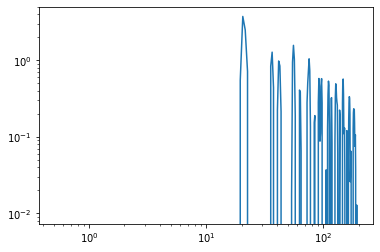

In [43]:
plt.loglog(radii, g_average-1)